# Ομάδα 16
## Ορέστης Ζάρας 03118
## Γιώργος Τσιακατάρας 03118
## Άγγελος Μητροκώτσας 03118197

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install --upgrade pip 
# !pip install scikit-learn --upgrade 
# !pip install numpy --upgrade
# !pip install --upgrade matplotlib 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Μερος 1

# Εισαγωγή και Επισκόπηση των δεδομένων: 
## UCI Dataset: U14	Statlog (Landsat Satellite)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Νευρωνικά/sat.data", header=None, sep=' ')
df

,0,1,2,3,4,5,6,7,8,9,...,27,28,29,30,31,32,33,34,35,36
0,92,115,120,94,84,102,106,79,84,102,...,104,88,121,128,100,84,107,113,87,3
1,84,102,106,79,84,102,102,83,80,102,...,100,84,107,113,87,84,99,104,79,3
2,84,102,102,83,80,102,102,79,84,94,...,87,84,99,104,79,84,99,104,79,3
3,80,102,102,79,84,94,102,79,80,94,...,79,84,99,104,79,84,103,104,79,3
4,84,94,102,79,80,94,98,76,80,102,...,79,84,103,104,79,79,107,109,87,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6430,60,83,96,85,64,87,100,88,64,83,...,92,66,87,108,89,63,83,104,85,1
6431,64,79,100,85,56,71,96,85,56,68,...,85,66,83,100,85,63,83,100,81,1
6432,56,68,91,81,56,64,91,81,53,64,...,81,59,87,96,81,63,83,92,74,5
6433,56,68,87,74,60,71,91,81,60,64,...,74,59,83,92,74,59,83,92,70,5


In [ ]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       6435 non-null   int64
 1   1       6435 non-null   int64
 2   2       6435 non-null   int64
 3   3       6435 non-null   int64
 4   4       6435 non-null   int64
 5   5       6435 non-null   int64
 6   6       6435 non-null   int64
 7   7       6435 non-null   int64
 8   8       6435 non-null   int64
 9   9       6435 non-null   int64
 10  10      6435 non-null   int64
 11  11      6435 non-null   int64
 12  12      6435 non-null   int64
 13  13      6435 non-null   int64
 14  14      6435 non-null   int64
 15  15      6435 non-null   int64
 16  16      6435 non-null   int64
 17  17      6435 non-null   int64
 18  18      6435 non-null   int64
 19  19      6435 non-null   int64
 20  20      6435 non-null   int64
 21  21      6435 non-null   int64
 22  22      6435 non-null   int64
 23  23      6435 

## Περιγραφή Δεδομένων

Το Data Set "Statlog (Landsat Satellite)" περιέχει δεδομένα σε μια δορυφορική εικόνα.
 
Κάθε frame μιας εικόνας του αποτελείται από τέσσερις ψηφιακές εικόνες, που απεικονίζουν την ίδια σκηνή σε διαφορετικές φασματικές ζώνες. Δύο από αυτές είναι στο ορατό φάσμα  (που αντιστοιχεί περίπου σε πράσινες και κόκκινες περιοχές του ορατού φάσματος) και δύο βρίσκονται (κοντά) στην περιοχή των υπέρυθρων ακτινοβολιών. Κάθε pixel είναι μια 8-bit δυαδική λέξη, με το 0 να αντιστοιχεί σε μαύρο και το 255 σε λευκό. Η χωρική ανάλυση ενός pixel είναι περίπου 80m x 80m και κάθε εικόνα περιέχει 2340 x 3380 τέτοια pixel

Η βάση δεδομένων είναι μια υποπεριοχή μιας σκηνής, που αποτελείται από 82 x 100 pixels (εικονοστοιχεία). Κάθε γραμμή δεδομένων αντιστοιχεί σε μια τετράγωνη γειτονιά 3x3 των pixel που περιέχονται πλήρως στην υποπεριοχή 82x100 και αποτελείται από τις πολυφασματικές τιμές (τις τιμές των pixel στις τέσσερις φασματικές ζώνες) (σε μορφή ASCII) καθενός από τα 9 pixel σε αυτή τη γειτονιά 3x3 και έναν αριθμό που υποδεικνύει την ετικέτα ταξινόμησης του κεντρικού pixel. Τα δεδομένα μας δίνονται με τυχαία σειρά και οι τιμές των pixels διαβάζονται με σειρά από τα αριστερά στα δεξία σε κάθε γραμμή και top-to-bottom σε όλο τον πίνακα (δίνονται αρχικά στον πίνακα οι 4 φασματικές τιμές για το πανω αριστερά εικονοστοιχείο, μετά για το πάνω μεσαίο, κοκ). Στόχος μας είναι να προβλέψουμε αυτή η ταξινόμηση με δεδομένες τις πολυφασματικές τιμές. 


Δεν χρειάστηκε να κάνουμε μετατροπές στα αρχεία plain text μόνο να εννώσουμε τα δύο αρχεία σε ένα ώστε να ορίσουμε από την αρχή τα train και test sets. 

* **Πλήθος δειγμάτων**: 6435 
* **Πλήθος χαρακτηριστικών**: 36 (4 φασματικές τιμές x 9 pixels σε κάθε γειτονιά)
* **Μη διατεταγμένα χαρακτηριστικά**: Οχι
Δεν υπάρχουν επικεφαλίδες ή αρίθμηση γραμμών.
* **Είδος όλων των χαρακτηριστικών**: Τα χαρακτηριστικά είναι ακέραιοι (Integers), από 0 εως 255, όπως σχολιάστηκε λεπτομερώς παραπάνω.

Οι ετικέτες των κλάσεων βρίσκονται στην τελευταία κολώνα των δεδομένων (με αρίθμηση από το μηδέν στη θέση 36) και είναι οι εξής: 
* 1) red soil
* 2) cotton crop
* 3) grey soil
* 4) damp grey soil
* 5) soil with vegetation stubble
* 6) mixture class (all types present)
* 7) very damp grey soil
Παρατηρούμε πως από την κλάση 6 (mixture class) δεν έχουμε κανένα δείγμα άρα για την ταξινόμηση δεν μας επηρεάζει.

## Προετοιμασία

Ελέγχουμε αν απουσιάζουν οι τιμές κάποιων χαρακτηριστικών (καθώς αφού τα datasets δημιουργούνται από μετρήσεις ή αντικείμενα του πραγματικού κόσμου μπορεί σε έναν αριθμό δειγμάτων κάποιες τιμές να απουσιάζουν):

In [ ]:
print("#NaN in our dataset =", np.sum(np.sum(df.isna())))

#NaN in our dataset = 0


Κρατάμε τις κλάσεις από την τελευταία στήλη του πίνακα και εξετάζουμε πόσα στοιχεία εμφανίζονται στην κάθε μία.

Παρατηρούμε πως το dataset δεν είναι απόλυτα ισορροπημένο καθώς στον ποσοστό των δειγμάτων ανά κλάση υπάρχει απόκλιση, ωστόσο αποφασίσαμε να δουλέψουμε με τις κλάσεις ως έχουν.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Νευρωνικά/sat.data", header=None, sep=' ')

# df.head(30)

classes = df.iloc[:,-1].values
freq = np.array(np.unique(classes, return_counts=True)).T
percentage = []
for i in range(0,6):
  percentage.append([freq[i][0], freq[i][1] * 100/6435])
print("The #No of attributes belonging to each class: \n", freq, "\n")

print("The % percentage of attributes of each class: \n", percentage)

The #No of attributes belonging to each class: 
 [[   1 1533]
 [   2  703]
 [   3 1358]
 [   4  626]
 [   5  707]
 [   7 1508]] 

The % percentage of attributes of each class: 
 [[1, 23.822843822843822], [2, 10.924630924630925], [3, 21.103341103341105], [4, 9.728049728049728], [5, 10.986790986790988], [7, 23.434343434343436]]


Δαχωρίζουμε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σύνολο δοκιμών (test set) με 30% των δειγμάτων στο test set:

In [ ]:
features = df.iloc[:,0:36].values
labels = df.iloc[:,-1].values

train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.30)

## **Ταξινόμηση**
## Ταξινομιτές -- Out of the box:

### Dummy Classifier

Θα δοκιμάσουμε πρώτα κάποιες πολύ απλές τακτικές ταξινόμησης. Η κλάση DummyClassifier δέχεται μια παράμετρο strategy που καθορίζει την τακτική της ταξινόμησης ως εξής:

* uniform: προβλέπει τυχαία και ομοιόμορφα.
* most_frequent: προβλέπει πάντα την πιο συχνή κατηγορία στο training set.
* stratified: κάνει προβλέψεις διατηρώντας την κατανομή των κλάσεων στο training set.
* prior: προβλέπει πάντα την κατηγορία με την μεγαλύτερη prior πιθανότητα
* constant: προβλέπει πάντα μία κατηγορία που τη διαλέγει ο χρήστης

In [ ]:
outofthebox_dictionary = {}
outofthebox_dictionary_f1 = {}
strategies = ['uniform', 'most_frequent', 'stratified', 'prior', 'constant']
dummy_names = ['unifrom','most_frequent','stratified', 'prior', 'constant']
name=0
for strategy in strategies:
  if(strategy == 'constant'):
   no = random.choice([1,2,3,4,5,7])
   dummy = DummyClassifier(strategy = strategy, constant = no)
   dummy = dummy.fit(train, train_labels)
   dummyname = 'constant' + str(no)
  else: 
    dummy = DummyClassifier(strategy = strategy)
    dummy = dummy.fit(train, train_labels)
    dummyname = dummy_names[name]
  dummy_pred = dummy.predict(test)
  outofthebox_dictionary[dummyname] = accuracy_score(test_labels, dummy_pred)
  outofthebox_dictionary_f1[dummyname] = f1_score(test_labels, dummy_pred, average="macro")
  name = name + 1

### Gaussian Naive Bayes (GNB)

Πρακτικά, με τα δεδομένα του training set, για κάθε κλάση υπολογίζουμε τη μέση τιμή και τη διακύμανση κάθε χαρακτηριστικού για τη συγκεκριμένη κλάση.
Όσο πιο κοντά στη μέση τιμή του (ως προς το σύνολο του train set) είναι ένα χαρακτηριστικό ενός δείγματος, τόσο πιο κοντά στη μοναδα θα είναι η πιθανοφάνεια του χαρκτηριστικού και αντιθετοαντίστροφα. Οι παραμετρικοί ταξινομητές κάνουν κάποια υπόθεση για την κατανομή (των χαρακτηριστικών) των δεδομένων και την προσδιορίζουν μέσω παραμέτρων. Στην περίπτωση του Gaussian Naive Bayes, η υπόθεση είναι η κανονική κατανομή και οι παράμετροι είναι οι μέσες τιμές και οι διακυμάνσεις  των χαρακτηριστικών.

In [ ]:
gnb = GaussianNB()
gnb.fit(train, train_labels)

gnb_pred = gnb.predict(test)
outofthebox_dictionary['gnb'] = accuracy_score(test_labels, gnb_pred)
outofthebox_dictionary_f1['gnb'] = f1_score(test_labels, gnb_pred, average="weighted")

### K Nearest Neighbours (kNN)

O kNN είναι ένας μη παραμετρικός ταξινομητής βασισμένος σε παραδείγματα (instance-based). Η αρχή λειτουργίας του είναι πολύ απλή. Για ένα νέο δείγμα προς ταξινόμηση, πρώτα υπολογίζουμε τους k πλησιέστερους γείτονές του (στον ν-διάστατο χώρο των χαρακτηριστικών εισόδου) με βάση κάποια συνάρτηση απόστασης (συνήθως ευκλείδεια). Η κλάση του νέου δείγματος θα είναι η κλάση της πλειοψηφίας των k γειτόνων του, είτε απλά υπολογισμένη (άθροισμα) είτε ζυγισμένη με βάση την απόσταση του κάθε γείτονα.

Ο kNN δεν έχει πρακτικά φάση εκπαίδευσης. Ωστόσο, για να ταξινομήσουμε ένα νέο δείγμα στην φάση test, πρέπει να συγκρίνουμε την απόστασή του με κάθε δείγμα του train set. Αυτό σημαίνει ότι για την ταξινόμηση είναι απαραίτητα όλα τα δείγματα εκπαίδευσης (εξού και η ονομασία "instance-based", ενώ στον GNB χρειαζόμαστε μόνο τις παραμέτρους). Αυτό σημαίνει ότι ο kNN είναι πιο απαιτητικός και σε χώρο (αποθήκευση όλων των δειγμάτων) και σε χρόνο (υπολογισμός όλων των αποστάσεων για κάθε νέο δείγμα).

Η υπερπαράμετρος k ελέγχει το trade-off μεταξύ μεταξύ απόκλισης και διακύμνανσης:

Έαν θέσουμε μικρό k, πχ k=1 παίρνουμε ένα ταξινομητή με υψηλή διακύμανση και χαμηλή απόκληση. Ο ταξινομητής τείνει να αγνοεί τη συνολική κατανομή και αποφασίζει μόνο από το κοντινότερο δείγμα. Στην περίπτωση k=1 το σύνορο απόφασης (decision boundary) περνά από τις μεσοκάθετους γειτονικών δειγμάτων διαφορετικής κλάσης.

Αν διαλέξουμε μεγαλύτερο k, φτιάχνουμε ένα ταξινομητή με χαμηλότερη διακύμανση και υψηλότερη απόκλιση. Θα ταξινομίσει λάθος περισσότερα αποκλίνοντα δείγματα (outliers) αλλά θα σέβεται περισσότερο τη συνολική κατανομή.

In [ ]:
knn = KNeighborsClassifier()
knn.fit(train, train_labels)

knn_pred = knn.predict(test)
outofthebox_dictionary['knn'] = accuracy_score(test_labels, knn_pred)
outofthebox_dictionary_f1['knn'] = f1_score(test_labels, knn_pred, average="weighted")

### Logistic Regression (LR)

O logistic regression classifier αποτελεί μια επέκταση του linear regression. Υπολογίζεται το g(x) = w.T * x + w0 για κάθε δείγμα x και περνιέται στην συνάρτηση softmax η οποία έχει ως έξοδο πιθανότητες.Για να λάβουμε τιμές στο διάσημα μεταξύ 0 και 1 θα βοηθήσει η λογιστική σιγμοειδής συνάρτηση ή απλά λογιστική συνάρτηση, f(x)=1/(1+e^(-x)).
O ταξινομητής λογιστικής παλινδρόμησης είναι κυρίως κατάλληλος για binary problems με διακριτές κατηγορίες. Το πρόβλημά μας δεν είναι ένα τέτοιο πρόβλημα.

In [ ]:
logisticRegr = LogisticRegression()
logisticRegr.fit(train, train_labels)

logisticRegr_pred = logisticRegr.predict(test)
outofthebox_dictionary['logisticRegr'] = accuracy_score(test_labels, logisticRegr_pred)
outofthebox_dictionary_f1['logisticRegr'] = f1_score(test_labels, logisticRegr_pred, average="weighted")

### Μετρικές

In [ ]:
print("accuracy:" ,outofthebox_dictionary)
print("f1 score:" ,outofthebox_dictionary_f1)


accuracy: {'unifrom': 0.17711030554117038, 'most_frequent': 0.2278612118073537, 'stratified': 0.19523562920766444, 'prior': 0.2278612118073537, 'constant1': 0.24702226825479026, 'gnb': 0.7918177110305541, 'knn': 0.8948731227343345, 'logisticRegr': 0.7788710512687727}
f1 score: {'unifrom': 0.17162100958048654, 'most_frequent': 0.061858568817657805, 'stratified': 0.17008939888629948, 'prior': 0.061858568817657805, 'constant1': 0.06602990033222592, 'gnb': 0.7998774756728556, 'knn': 0.8947525368733494, 'logisticRegr': 0.7573408774215257}


##Προεπεξεργασία και Βελτιστοποίηση


### **Προεπεξεργασία:**
Μια διαδικασία ML ή workflow ή pipeline αποτελείται από μια σεiρα μετασχηματιστών πάνω στα χαρακτηριστικά των δεδομένων που τελειώνει σε έναν estimator (εκτιμητή/ταξινομητή). Οι μετασχηματιστές χρησιμοποιούνται για να κανουν την προεπεξεργασία (μέσω μετασχηματισμού) των δεδομένων.
Όπως θα δούμε αναλυτικά παρακάτω, οι μετασχηματιστές γενικα έχουν και αυτοί υπερ-παραμέτρους που επηρρεάζουν τη λειτουργία τους (πχ ο VarianceThreshold είχε το κατώτερο κατώφλι διακύμανσης ο PCA τον αριθμό των κύριων συνιστωσών). Η επιλογή των υπερ-παραμέτρων (όπως το k του kNN) γίνεται μόνο εμπειρικά μέσω διασταυρούμενης επικύρωσης (cross-validation). Οι μετασχηματιστές και οι υπερπαράμετροι τους επιδρούν λοιπόν στη μορφή των δεδομένων.

**Ορισμός ενός εκπαιδευμένου μοντέλου estimator (εκτιμητή/ταξινομητή):**

Μια ολοκληρωμένη διαδικασία pipeline λόγω του ότι τελειώνει σε έναν εκτιμητή μπορεί να θεωρηθεί και συνολικά ως ένας εκτιμητής, με κανένα, με λίγους ή με περισσότερους μετασχηματιστές πριν από τον εκτιμητή. Ένα εκπαιδευμένο μοντέλο εκτιμητή (ταξινομητή) αποτελείται
* απο την αρχιτεκτονική του, δηλαδή τον συνδυασμό μετασχηματιστών και την επιλογή του τελικού εκτιμητή (το pipeline), και
* από τις (βέλτιστες) τιμές των υπερ-παραμέτρων όλων των προηγουμένων που προκύπτουν από το cross-validation.

Θέλουμε να βελτιώσουμε τα ποσοστά accuracy και f1 score που επιτυγχάνουν κατά τη διαδικασία του (10-fold) cross validation καθένας από τους ταξινομητές Guassian Naive Bayes, k-Neirest Neighbors και Linear Regression. Για το σκοπό αυτό θα πρέπει να χρησιμοποιήσουμε κάποιες τεχνικές pre-processing στα δεδομένα μας, προσπαθώντας ταυτόχρονα να βελτιστοποιήσουμε τις υπερπαραμέτρους τόσο αυτών όσο και των ταξινομητών. Θα δοκιμάζουμε τεχνικές μείωσης της διαστατικότητας με επιλογή χαρακτηριστικών (Variance Threshold), τεχνικές μείωσης της διαστατικότητας με εξαγωγή χαρακτηριστικών, (ανάλυση σε κύριες συνιστώσες/PCA) και κανονικοποπίηση των χαρακτηριστικών με διαίρεση με τη διαφορά μεγίστου ελαχίστου (feature scaling) ή με z-score (standard score) του κάθε χαρακτηριστικού (standardization). 

Αφού το κάθε pipeline κάνει μια σειρά από προεπεξεργασίες, χρησιμοποιήσαμε την GridSearchCV  η οποία μας έδωσε τον βέλτιστο συνδυασμό Selector, Scaler, Sampler και PCA. 

### **Βελτιστοποίηση**: 
Στην βελτιστοποίηση, στους ταξινομητές, πρόκειται να εφαρμοστεί η εξής λογική:

Θα κρατήσουμε τα pipelines τα οποία επιφέρουν τo καλύτερο accuracy score και το καλύτερο f1 score (μπορεί να είναι το ίδιο pipeline).
Αφού το κάθε pipeline κάνει μια σειρά από προεπεξεργασίες, χρησιμοποιήσαμε την GridSearchCV (1 φορά για το accuracy και μια για το f1 score), η οποία κάνει παντού 10-fold cross validation, αφού θέσαμε την παράμετρο cv = 10, για να βρούμε την καλύτερη "σειρά" από προεπεξεργασίες, η οποία μας έδωσε τα βέλτιστα variance και pca για τον κάθε ταξινομιτή. 
Scaler βάλαμε μόνο MinMax και οχι standard ή Z-scaler, καθώς ο MinMax μας εγκυάται πως όλα τα χαρακτηριστιμά μας θα βρίσκονται στην ίδια ακριβώς κλίμακα μετά την κανονικοποίση και στα δεδομένα μας (αριθμοί από 0 εως 255)δεν υπάρχουν στοιχεία που διαφέρουν σημαντικά από τα υπόλοιπα (Outliers).

Στον kNN προστέθηκε στην GrindSearchCV και η υπερπαράμετρος k του ταξινομητή.

### **Για την εξισορρόπηση τoυ (μη ισορροπημένου) dataset:**
Με τον όρο μη ισορροπημένο dataset εννούμε ένα dataset στο οποίο τα πλήθη των δειγμάτων της κάθε κλάσης διαφέρουν σημαντικά μεταξύ τους. Χωρίς να υπάρχει κάποια συνολική απάντηση,  αν μια οποιαδήποτε κλάση είναι 1.5 φορά πιο συχνή από κάποια άλλη (δηλαδή αν ο λόγος μεταξύ του αριθμού των δειγμάτων δύο κλάσεων αρχίζει να είναι μεγαλύτερος από 2:3), αρχίζουμε να θεωρούμε το dataset μη ισορροπημένο (imbalanced). Όπως διαπιστώθηκε παραπάνω, το dataset μας δεν το θεωρούμε ισορροπημένο. Τα δεδομένα εκπαίδευσης δεν έχουν ισορροπημένα πλήθη ανά κατηγορία με τις πιο συχνές κατηγορίες να έχουν πάνω από τα διπλάσια στοιχεία από τις λιγότερο συχνές. Για να εξισσοροπούμε το dataset μας θα κάνουμε random oversampling, επιλέγουμε δηλαδή τυχαία ορισμένα παραδείγματα από τις λιγότερο συχνές κατηγορίες και τα επαναλαμβάνουμε.

In [ ]:
import time
import timeit
from sklearn.model_selection import GridSearchCV
# from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline


from sklearn import preprocessing
from sklearn.feature_selection import VarianceThreshold
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report

# import warnings filter, θα το βγαζουμε απτα σχολια οταν ειματε σιγουροι οτι τρεχει
import warnings
warnings.filterwarnings("ignore")

opt_dictionary = {}
opt_dictionary_f1 = {}

selector = VarianceThreshold()
min_max_scaler = preprocessing.MinMaxScaler()
std_scaler = preprocessing.StandardScaler()
pca = PCA()
ros = RandomOverSampler()

#new_dummy = DummyClassifier()

vthreshold = [0,25,50,75,100]
n_components = [16, 19, 21, 22, 25, 28, 30]                     #[1, 5, 10, 15, 20, 30, 35] παρατηρήσαμε πως επιλέγονται πάντα τιμες μεταξυ 15-30

####Dummy

In [ ]:
strategies = ['uniform', 'most_frequent', 'stratified', 'prior', 'constant']
dummy_names = ['unifrom','most_frequent','stratified', 'prior', 'constant']
name=0

for strategy in strategies:
  if(strategy == 'constant'):
   no = random.randint(1,6)
   new_dummy = DummyClassifier(strategy = strategy, constant = no)
   new_dummy = new_dummy.fit(train, train_labels)
   dummyname = 'constant' + str(no)
  else: 
    new_dummy = DummyClassifier(strategy = strategy)
    new_dummy = new_dummy.fit(train, train_labels)
    dummyname = dummy_names[name]
  dummy_pipe = Pipeline(steps=[('scaler', min_max_scaler), ('selector', selector), ('sampler', ros), ('pca', pca), ('dummy', new_dummy)], memory = 'tmp') ##minmax

  dummy_estimator = GridSearchCV(dummy_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)
  dummy_estimator.fit(train, train_labels)
  dummy_preds = dummy_estimator.predict(test)
  print("Using f1 score:")
  print(classification_report(test_labels, dummy_preds))
  print(dummy_estimator.best_estimator_)
  print(dummy_estimator.best_params_,'\n')


  acc_dummy_estimator = GridSearchCV(dummy_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)
  acc_dummy_estimator.fit(train, train_labels)
  acc_dummy_preds = acc_dummy_estimator.predict(test)
  print("Using accuracy score:")
  print(classification_report(test_labels, acc_dummy_preds))
  print(acc_dummy_estimator.best_estimator_)
  print(acc_dummy_estimator.best_params_,'\n','\n','\n')
  opt_dictionary['dummy'] = accuracy_score(test_labels, acc_dummy_preds)
  opt_dictionary_f1['dummy'] = f1_score(test_labels, dummy_preds, average="weighted")
  name = name + 1

#***!!!!!μη τα σβησεις ακομα!!!!!***

# dummy_pipe = Pipeline(steps=[('scaler', min_max_scaler), ('selector', selector), ('sampler', ros), ('pca', pca), ('dummy', new_dummy)], memory = 'tmp') ##minmax

# dummy_estimator = GridSearchCV(dummy_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)
# dummy_estimator.fit(train, train_labels)
# dummy_preds = dummy_estimator.predict(test)
# print("Using f1 score:")
# print(classification_report(test_labels, dummy_preds))
# print(dummy_estimator.best_estimator_)
# print(dummy_estimator.best_params_,'\n')


# acc_dummy_estimator = GridSearchCV(dummy_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)
# acc_dummy_estimator.fit(train, train_labels)
# acc_dummy_preds = acc_dummy_estimator.predict(test)
# print("Using accuracy score:")
# print(classification_report(test_labels, acc_dummy_preds))
# print(acc_dummy_estimator.best_estimator_)
# print(acc_dummy_estimator.best_params_,'\n','\n','\n')

# opt_dictionary['dummy'] = accuracy_score(test_labels, acc_dummy_preds)
# opt_dictionary_f1['dummy'] = f1_score(test_labels, dummy_preds, average="weighted")

Using f1 score:
              precision    recall  f1-score   support

           1       0.25      0.17      0.20       477
           2       0.07      0.10      0.08       221
           3       0.19      0.14      0.16       406
           4       0.10      0.17      0.13       183
           5       0.09      0.15      0.11       204
           7       0.24      0.18      0.21       440

    accuracy                           0.16      1931
   macro avg       0.16      0.15      0.15      1931
weighted avg       0.18      0.16      0.16      1931

Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=22)),
                ('dummy', DummyClassifier(strategy='uniform'))])
{'pca__n_components': 22, 'selector__threshold': 0} 

Using accuracy score:
              precision    recall  f1-score   support

           1       0.23      0.14  

####GNB

In [ ]:
new_gnb = GaussianNB()
gnb_pipe = Pipeline(steps=[ ('scaler', min_max_scaler), ('selector', selector), ('sampler', ros), ('pca', pca), ('gnb', new_gnb)], memory = 'tmp') ##minmax


gnb_estimator = GridSearchCV(gnb_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)
gnb_estimator.fit(train, train_labels)
gnb_preds = gnb_estimator.predict(test)
# print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("Using f1 score:")
print(classification_report(test_labels, gnb_preds))
print(gnb_estimator.best_estimator_)
print(gnb_estimator.best_params_)

print("Using accuracy score:")
acc_gnb_estimator = GridSearchCV(gnb_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='accuracy', n_jobs=-1)
acc_gnb_estimator.fit(train, train_labels)
acc_gnb_preds = acc_gnb_estimator.predict(test)
# print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(test_labels, acc_gnb_preds))
print(acc_gnb_estimator.best_estimator_)
print(acc_gnb_estimator.best_params_)

opt_dictionary['GNB'] = accuracy_score(test_labels, acc_gnb_preds)
opt_dictionary_f1['GNB'] = f1_score(test_labels, gnb_preds, average="weighted")

Using f1 score:
              precision    recall  f1-score   support

           1       0.97      0.96      0.96       477
           2       0.85      0.98      0.91       221
           3       0.88      0.89      0.89       406
           4       0.45      0.57      0.51       183
           5       0.79      0.73      0.76       204
           7       0.88      0.74      0.80       440

    accuracy                           0.84      1931
   macro avg       0.80      0.81      0.80      1931
weighted avg       0.85      0.84      0.84      1931

Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=21)),
                ('gnb', GaussianNB())])
{'pca__n_components': 21, 'selector__threshold': 0}
Using accuracy score:
              precision    recall  f1-score   support

           1       0.96      0.96      0.96       477
        

KNN

In [ ]:
k = [1, 5, 10, 25, 20] # η υπερπαράμετρος του ταξινομητή

new_knn = KNeighborsClassifier(n_jobs=-1)
knn_pipe = Pipeline(steps=[('scaler', min_max_scaler), ('selector', selector), ('sampler', ros), ('pca', pca), ('kNN', new_knn)], memory = 'tmp') ##minmax

knn_estimator = GridSearchCV(knn_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=10, scoring='f1_macro', n_jobs=-1)
knn_estimator.fit(train, train_labels)
knn_preds = knn_estimator.predict(test)
# print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("Using f1 score:")
print(classification_report(test_labels, knn_preds))
print(knn_estimator.best_estimator_)
print(knn_estimator.best_params_)

print("Using accuracy score:")
acc_knn_estimator = GridSearchCV(knn_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components, kNN__n_neighbors=k), cv=10, scoring='accuracy', n_jobs=-1)
acc_knn_estimator.fit(train, train_labels)
acc_knn_preds = acc_knn_estimator.predict(test)
# print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print(classification_report(test_labels, acc_knn_preds))
print(acc_knn_estimator.best_estimator_)
print(acc_knn_estimator.best_params_)

opt_dictionary['kNN'] = accuracy_score(test_labels, acc_knn_preds)
opt_dictionary_f1['kNN'] = f1_score(test_labels, knn_preds, average="weighted")

Using f1 score:
              precision    recall  f1-score   support

           1       0.98      0.97      0.98       477
           2       0.98      0.94      0.96       221
           3       0.87      0.89      0.88       406
           4       0.62      0.71      0.66       183
           5       0.87      0.87      0.87       204
           7       0.90      0.86      0.88       440

    accuracy                           0.89      1931
   macro avg       0.87      0.87      0.87      1931
weighted avg       0.89      0.89      0.89      1931

Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=19)),
                ('kNN', KNeighborsClassifier(n_jobs=-1, n_neighbors=1))])
{'kNN__n_neighbors': 1, 'pca__n_components': 19, 'selector__threshold': 0}
Using accuracy score:
              precision    recall  f1-score   support

     

####Logistic Regression

In [ ]:
new_logisticRegr = LogisticRegression()

logreg_pipe = Pipeline(steps=[('scaler', min_max_scaler),( 'selector', selector), ('sampler', ros), ('pca', pca), ('gnb', new_gnb)], memory = 'tmp') ##minmax
logreg_estimator = GridSearchCV(logreg_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='f1_macro', n_jobs=-1)

logreg_estimator.fit(train, train_labels)
logreg_preds = logreg_estimator.predict(test)

# print("Συνολικός χρόνος fit και predict: %s seconds" % (time.time() - start_time))
print("Using f1 score:")
print(classification_report(test_labels, logreg_preds))
print(logreg_estimator.best_estimator_)
print(logreg_estimator.best_params_,'\n')


print("Using accuracy score:")
acc_logreg_estimator = GridSearchCV(logreg_pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=10, scoring='accuracy', n_jobs=-1)
acc_logreg_estimator.fit(train, train_labels)
acc_logreg_preds = logreg_estimator.predict(test)
print(classification_report(test_labels, acc_logreg_preds))

print(acc_logreg_estimator.best_estimator_)
print(acc_logreg_estimator.best_params_,'\n')

opt_dictionary['logistiRegr'] = accuracy_score(test_labels, acc_logreg_preds)
opt_dictionary_f1['logistiRegr'] = f1_score(test_labels, logreg_preds, average="weighted")

Using f1 score:
              precision    recall  f1-score   support

           1       0.97      0.96      0.96       477
           2       0.85      0.98      0.91       221
           3       0.88      0.89      0.89       406
           4       0.45      0.57      0.51       183
           5       0.79      0.73      0.76       204
           7       0.88      0.74      0.80       440

    accuracy                           0.84      1931
   macro avg       0.80      0.81      0.80      1931
weighted avg       0.85      0.84      0.84      1931

Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('sampler', RandomOverSampler()), ('pca', PCA(n_components=21)),
                ('gnb', GaussianNB())])
{'pca__n_components': 21, 'selector__threshold': 0} 

Using accuracy score:
              precision    recall  f1-score   support

           1       0.97      0.96      0.96       477
      

### Εδώ θα κρατήσουμε τους χρόνους για τα βέλτιστα μοντέλα:

##Αποτελέσματα

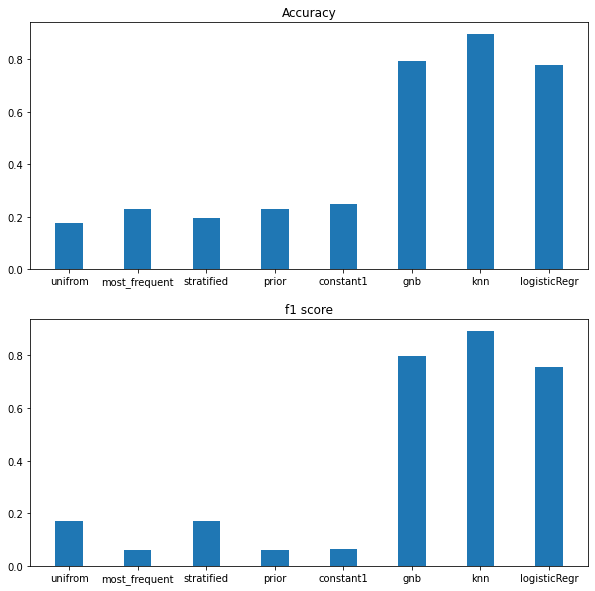

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(10, 10))

ax1.set_title('Accuracy')
ax2.set_title('f1 score')
ax1.bar(outofthebox_dictionary.keys(), outofthebox_dictionary.values(), width=0.4)
ax2.bar(outofthebox_dictionary_f1.keys(), outofthebox_dictionary_f1.values(), width=0.4)

fig.show()